In [1]:
#import the required libraries
%load_ext autoreload
%autoreload 2 
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt
import json
import seaborn as sns
from data_compilation import call_all_symbols
from data_cleaning import full_clean
from visualizations import *
from volatility import *
from hypothesis_tests import *

In [2]:
symbol_list = ['SLV', 'SIL', 'GLD', 'GDX', 'DJI']

In [3]:
#Getting the data
#df = call_all_symbols(symbol_list)
#df.tail()

In [4]:
#Cleaning data
df_clean = full_clean()

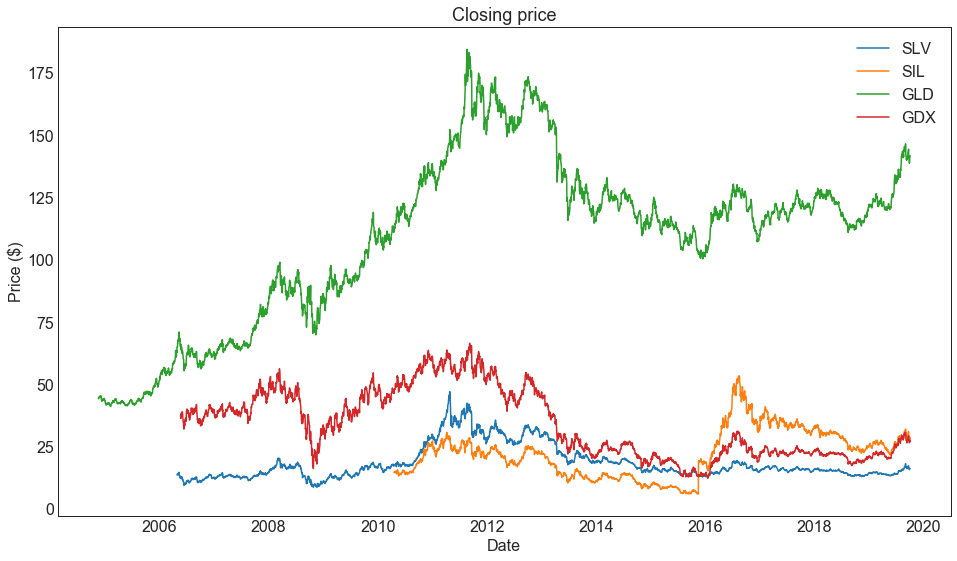

In [5]:
#make a plot from the observations
symbols = ['SLV', 'SIL', 'GLD','GDX']
visualizations_four(df_clean.copy(), symbols,
               type_price = 'close',
               start_date = '2000-01-01', 
               end_date = '2019-10-04', 
               fill_na = 'ffill',
               moving_average_plot = False,
               short_window = 20,
               long_window = 100)

# Volatility per month

This function compute the average volatility for each month. Then, it ranks the months based on their average volatility and return a boxplot based on the averge ranking.

"Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security."

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


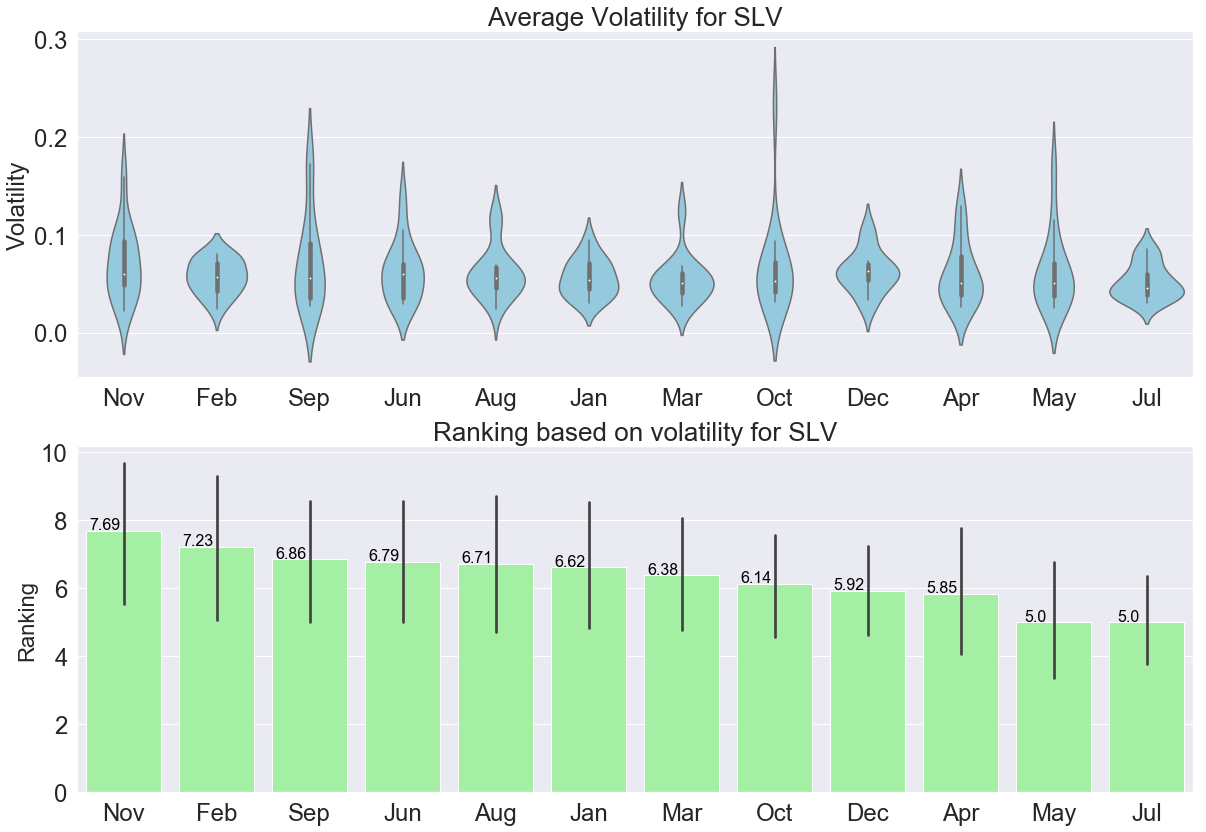

In [6]:
target_var = 'close'
target_symbol = 'SLV'
volability_period = 'M'
plot_option = True
n_bootstrap = 1000
if volability_period == 'Q':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_quarter'
elif volability_period == 'M':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_month'
    
volatility_set = compute_volatility(df_clean.copy(), target_var, target_symbol, volability_period)
monthly_vol_df, VOL_ranking_df = volatility_set
visualization_one(volatility_set, target_symbol, target_var, output_image_name)

# Hypothesis #1 part 1

The above figure shows that Over the past 13 years, November has been the most volatile month 
on average for the SLV stock and July is the least volatile. The question
is whether this is a persistent signal or just noise in the data?

The goal of this function, here, is to statiscally analyze and test
this phenomena to check whether is statistically significant or not.

$H_0$ : There is no monthly seasonality 

$H_A$ : There is monthly seasonality

Based on the p value of 0.58 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Apr
----------------------------------------------------------------------------------------------------
Based on the p value of 0.67 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Aug
----------------------------------------------------------------------------------------------------
Based on the p value of 0.64 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Dec
----------------------------------------------------------------------------------------------------
Based on the p value of 0.33 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, w

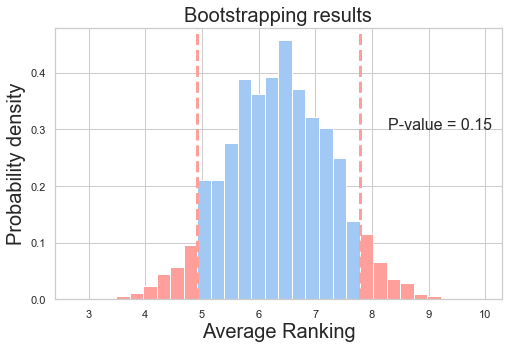

In [7]:
P_values = hypothesis_test_one(0.05, VOL_ranking_df, df_clean, 
                               target_var, target_symbol,volability_period,
                               n_bootstrap, plot_option, 'Nov')

# Volatility per quarter

This function compute the average volatility for each quarter. 
Then, it ranks the quarters based on their average volatility and return a boxplot based on the averge ranking.

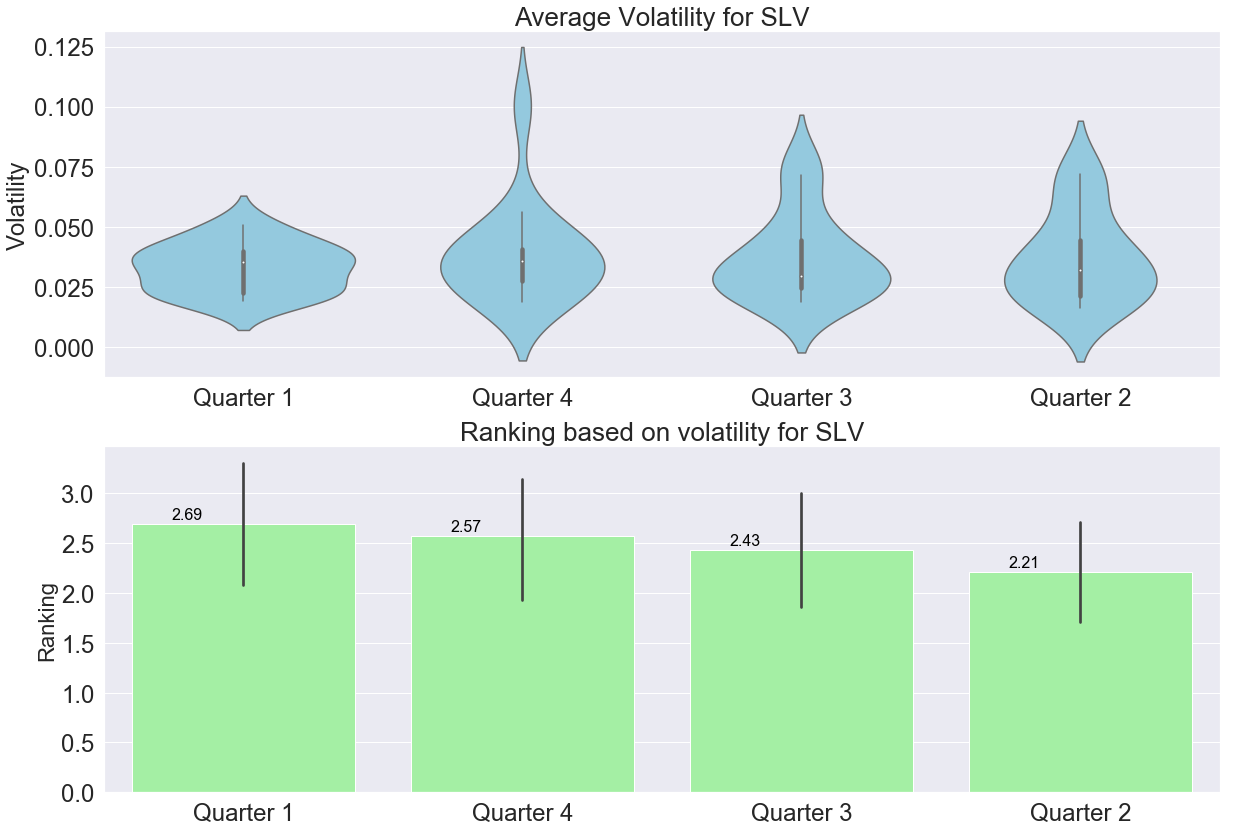

In [8]:
target_var = 'close'
target_symbol = 'SLV'
volability_period = 'Q'
plot_option = True
n_bootstrap = 10000
if volability_period == 'Q':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_quarter'
elif volability_period == 'M':
    output_image_name = f'volatility_monthly_{target_var}_{target_symbol}_month'
    
volatility_set = compute_volatility(df_clean.copy(), target_var, target_symbol, volability_period)
monthly_vol_df, VOL_ranking_df = volatility_set
visualization_one(volatility_set, target_symbol, target_var, output_image_name)

# Hypothesis #1 part 2

The above figure shows that Over the past 13 years, Qauarter 1 has been the most volatile qauarter 
on average for the SLV stock and Qauarter 2 is the least volatile qauarter. The question
is whether this is a persistent signal or just noise in the data?

The goal of this function, here, is to statiscally analyze and test
this phenomena to check whether is statistically significant or not.

$H_0$ : There is no seasonality 

$H_A$ : There is monthly seasonality

Based on the p value of 0.47 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Quarter 1
----------------------------------------------------------------------------------------------------
Based on the p value of 0.33 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Quarter 2
----------------------------------------------------------------------------------------------------
Based on the p value of 0.81 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that the seasonality in the volatility is due to chance in Quarter 3
----------------------------------------------------------------------------------------------------
Based on the p value of 0.68 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due t

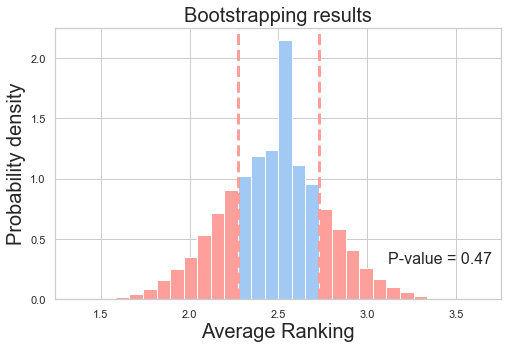

In [9]:
P_values = hypothesis_test_one(0.05, VOL_ranking_df, df_clean, 
                               target_var, target_symbol,volability_period,
                               n_bootstrap, plot_option, 'Quarter 1')